In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### (1)  Practice with decoding time in Pandas, Part I
**Insructions**
- (a.) Read in the tidal gauge data from Antarctica (circa an earlier assignment; **new version found in the folder with these exercises, '20041226.txt' that you MUST use**), but now the full, messier data file
<br><br>

*Create the datetime64 objects TWO different ways*
- (b.) pass the three time-related columns to pd.to_datetime after converting each column to a string and concatenating all three columns of strings together - no other modifications made -- and then leverage the 'format' argument....useful to know how in case you encounter extra-complicated date-time data in future - YOU MUST USE THE FORMAT ARGUMENT
<br><br>
- (c.) get the three time-related columns in the right format, such that pd.to_datetime can natively decode them, when passing to pd.to_datetime as a concatenated string- YOU DON'T USE THE FORMAT ARGUMENT
<br><br>
- for both ways, save your datetime objects to a new column, print this new column, and print the type of the column, to prove to yourself what you have done

In [28]:
# (a.) 

# Read in file (sep is set to whitespace delim)
df = pd.read_csv('20041226.txt', header=0, sep='\s+')
df

,YEAR,MM/DD,UTC+3,Tide(cm)
0,2004,12/26,00:00:00,1250
1,2004,12/26,00:00:30,1250
2,2004,12/26,00:01:00,1250
3,2004,12/26,00:01:30,1250
4,2004,12/26,00:02:00,1250
...,...,...,...,...
2875,2004,12/26,23:57:30,1258
2876,2004,12/26,23:58:00,1256
2877,2004,12/26,23:58:30,1249
2878,2004,12/26,23:59:00,1240


In [38]:
# (b.)
df = df.astype('str') # Convert all values to strings

# Concat strings in each row and convert to datetime objects
dates = pd.to_datetime(df['YEAR']+df['MM/DD']+df['UTC+3'], format='%Y%m/%d%H:%M:%S')
df['datetimes'] = dates
df['datetimes']

0      2004-12-26 00:00:00
1      2004-12-26 00:00:30
2      2004-12-26 00:01:00
3      2004-12-26 00:01:30
4      2004-12-26 00:02:00
               ...        
2875   2004-12-26 23:57:30
2876   2004-12-26 23:58:00
2877   2004-12-26 23:58:30
2878   2004-12-26 23:59:00
2879   2004-12-26 23:59:30
Name: datetimes, Length: 2880, dtype: datetime64[ns]

In [39]:
# (c.)
dates2 = pd.to_datetime(df['YEAR']+'/'+df['MM/DD']+' '+df['UTC+3'], yearfirst=True)
df['datetimes2'] = dates2
df['datetimes2']

0      2004-12-26 00:00:00
1      2004-12-26 00:00:30
2      2004-12-26 00:01:00
3      2004-12-26 00:01:30
4      2004-12-26 00:02:00
               ...        
2875   2004-12-26 23:57:30
2876   2004-12-26 23:58:00
2877   2004-12-26 23:58:30
2878   2004-12-26 23:59:00
2879   2004-12-26 23:59:30
Name: datetimes2, Length: 2880, dtype: datetime64[ns]

### (2)  Practice with decoding time in Pandas, Part II
**Instructions**
- (a.) Read in radiation data collected every 30 minutes near Champaign ('889299_40.13_-88.26_2019.csv')....since you've been working with different types of radiation data lately!
    - You WILL need to add something extra to your pd.read_csv statement, yes?
<br><br>
- (b.) Take columns containing date-time information and create *datetime64* objects, save to a new column, print this new column, and print the type of the new column
<br><br>
- (c.) Pull out just the month from your new column containing the now date-time objects and save it to the variable 'months'
<br><br>
- (d.) I use this to group the data by month and take a monthly mean and plot it for you.  Take a close look at the code for this - a good additional example of groupby before you formally learn it in Week 11 lessons!
<br><br>
- (e.) YOUR TURN AGAIN - INTERPRET THE PLOT: Surface albedo is the fraction of incoming solar radiation that is reflected by the surface.  Brighter colors = higher albedo - more reflection.  Darker colors = lower albedo - less reflection.  **YOUR Q TO ANSWER: As seen in the plot, why might the surface albedo be higher in certain months in central IL, and lower in other months?**

In [42]:
# (a.)

rad_df = pd.read_csv('889299_40.13_-88.26_2019.csv', skiprows=2, header=0)
rad_df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Surface Albedo,Temperature,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,2019,1,1,0,0,0.0,0.0,0.0,0.15,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,0,30,0.0,0.0,0.0,0.15,-0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,1,0,0.0,0.0,0.0,0.15,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,1,30,0.0,0.0,0.0,0.15,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,2,0,0.0,0.0,0.0,0.15,-1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0.0,0.0,0.0,0.15,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17516,2019,12,31,22,0,0.0,0.0,0.0,0.15,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17517,2019,12,31,22,30,0.0,0.0,0.0,0.15,-0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17518,2019,12,31,23,0,0.0,0.0,0.0,0.15,-0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# (b.)

# Convert necessary columns to strings
dt_cols = rad_df[['Year','Month', 'Day', 'Hour', 'Minute']].astype('str')

# Concat strings and convert to datetime
dates3 = pd.to_datetime(dt_cols['Year']+'/'+dt_cols['Month']+'/'+dt_cols['Day']+' '+dt_cols['Hour']+':'+dt_cols['Minute'],
                        format='%Y/%m/%d %H:%M')

rad_df['datetimes'] = dates3
rad_df['datetimes']


0         1
1         1
2         1
3         1
4         1
         ..
17515    12
17516    12
17517    12
17518    12
17519    12
Name: datetimes, Length: 17520, dtype: int32

In [55]:
# (c.)

# Grab months
months = rad_df['datetimes'].dt.month
rad = rad_df

datetimes
1     0.621613
2     0.363304
3     0.281774
4     0.186083
5     0.178952
6     0.181417
7     0.190645
8     0.187016
9     0.185000
10    0.189597
11    0.265333
12    0.308548
Name: Surface Albedo, dtype: float64


Text(0.5, 1.0, 'Monthly Average Surface Albedo in 2019 in Champaign, IL')

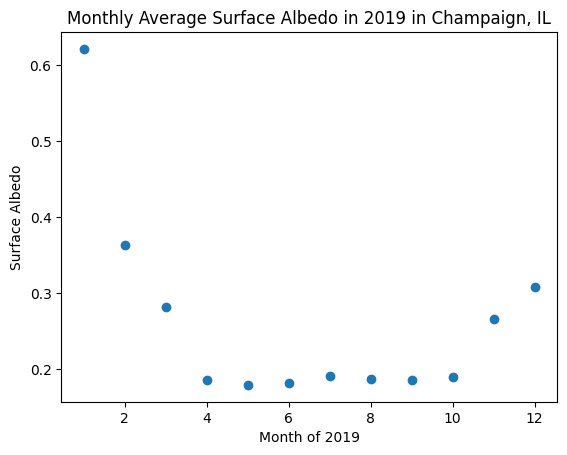

In [56]:
# (d.)
monthly_averages = rad['Surface Albedo'].groupby(months).mean()
print(monthly_averages)
fig, ax = plt.subplots()
ax.scatter(monthly_averages.index,monthly_averages)
ax.set_ylabel('Surface Albedo')
ax.set_xlabel('Month of 2019')
ax.set_title('Monthly Average Surface Albedo in 2019 in Champaign, IL')

In [ ]:
# (e.) Your interpretation! 

# The albedo appears to peak during the winter months while bottoms out during the summer months. This would make sense as during the winter, much of the vegeation is dead which turns a lot of
# plants, particularly grass, a more yellowish color, which is brighter and more prone to reflecting sunlight. During the spring and summer, plants blossom and crops start growing as well, 
# turning the landscape more green, which is a darker color and can absorb more sunlight, thus reducing albedo. 